### Actividad Final modulo 5

#### 1.- Enliste todas las librerias que utilizará 

In [66]:
# Tratamiento de datos
import numpy as np
import pandas as pd

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelo predictivo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### 2.- Importación y revisión de los datos Importe  ambos  sets.  Dado  que  la  fuente  de  datos  proviene  de  la  misma  base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de  los  datos  (numero  de  filas/columnas,  tipos  de  datos, estadísticas básicas, casos perdidos)

In [67]:
df_2009 = pd.read_csv('2009_1perc.csv')
df_2010 = pd.read_csv('2010_1perc.csv')

In [68]:
df_2009.shape

(5812, 112)

In [69]:
df_2010.shape

(6013, 112)

In [70]:
# Columnas diferentes
columnas_aux = []
for i in df_2010.columns:
    if df_2009[i].dtype != df_2010[i].dtype:
        columnas_aux.append(i)
columnas_aux

['perobs', 'addrpct', 'linecm', 'detailcm']

In [71]:
# Comparacion de variables
print("      2009                2010")
for i in columnas_aux:
    print(f'{i}: {df_2009[i].dtype} ----> {i}: {df_2010[i].dtype}')

      2009                2010
perobs: float64 ----> perobs: int64
addrpct: int64 ----> addrpct: object
linecm: int64 ----> linecm: object
detailcm: int64 ----> detailcm: object


In [72]:
# Transformar tipo de columnas
for i in columnas_aux:
    df_2009[i] = df_2009[i].astype(object)
    df_2010[i] = df_2010[i].astype(object)
    
    df_2009[i] = pd.to_numeric(df_2009[i], errors='coerce')
    df_2010[i] = pd.to_numeric(df_2010[i], errors='coerce')

    df_2009[i] = df_2009[i].astype(float)
    df_2010[i] = df_2010[i].astype(float)

In [73]:
df_total = pd.concat([df_2009,df_2010], axis=0, ignore_index=True)

In [74]:
df_total.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,addrpct,linecm,detailcm
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000,11824.000000,11824.0,11824.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615,68.629482,1.0,38.047023
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884,33.036558,0.0,25.317826
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,1.000000,1.0,6.000000
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000,42.000000,1.0,20.000000
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000,73.000000,1.0,28.000000
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000,102.000000,1.0,46.000000
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000,123.000000,1.0,113.000000


### 3. Preprocesamiento de datos  Habrá  notado  que  los  datos  parecen  tener  ciertas  inconsistencias.  Siga  los  siguientes pasos para limpiar este set: 

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas


In [75]:
variables_categoricas = df_total.select_dtypes(include=['object'])

In [76]:
variables_categoricas

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,...,aptnum,city,state,zip,sector,beat,post,xcoord,ycoord,dettypcm
0,A,O,P,CPW,P,Y,N,N,,N,...,,BRONX,,,G,7,,1013067,0238633,CM
1,A,O,P,BURG,P,Y,Y,N,,N,...,,QUEENS,,,J,,,1012043,0212157,CM
2,1,O,P,MISD,V,Y,N,N,,N,...,,BRONX,,,E,,,1017599,0240200,CM
3,A,O,P,MIS,P,Y,N,N,,N,...,,BROOKLYN,,,J,4,35,1002625,0183442,CM
4,A,O,P,CPW,P,Y,Y,N,,N,...,,QUEENS,,,H,,,1024535,0209890,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,1,O,H,MISD,P,Y,N,N,,N,...,,BROOKLYN,,,I,,,989382,155162,CM
11821,A,O,P,ROBBERY,R,Y,N,N,,N,...,,BROOKLYN,,,A,,,1012757,186018,CM
11822,A,O,P,GLA,P,Y,N,N,,Y,...,,STATEN IS,,,E,,,933868,138600,CM
11823,1,O,P,FELONY,P,Y,N,N,,N,...,,QUEENS,,,E,,,1014722,214388,CM


In [77]:
condicion = lambda x: (len(x.value_counts()) >= 2 and len(x.value_counts()) <= 99)
var_categoricas = variables_categoricas.apply(condicion)

In [78]:
var_categoricas[var_categoricas]

recstat     True
inout       True
trhsloc     True
typeofid    True
explnstp    True
            ... 
addrtyp     True
city        True
sector      True
beat        True
dettypcm    True
Length: 73, dtype: bool

#### 3.2 Reemplaze las siguientes clases faltantes: 

- Si  alguna  categoría  de  las  columnas  officrid,  offshld  o  offverb  es  igual  a  "" cambielo a 'N' y en caso contrario dejelo como 'Y'

In [79]:
for i in ["offshld","offverb","officrid"]:
    df_total[i].replace(df_total['offshld'].value_counts().index[0],"N",inplace=True)
    df_total[i].replace(df_total['offshld'].value_counts().index[1],"Y",inplace=True)

- Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [80]:
for i in ["sector","trhsloc","beat"]:
    df_total[i].replace(" ","U",inplace=True)

#### 3.3  Transforme  las  columnas  ht_feet  junto  con  ht_inchen  una  única  columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [81]:
df_total["meters"] = round((df_total["ht_feet"]+df_total["ht_inch"])*0.3048,4)

In [82]:
del df_total["ht_inch"]

In [83]:
del df_total["ht_feet"]

#### 3.4  Note  que  la  fecha  viene  en  un  formato  MMDDAAAA  en  la  columna  datestop.  Genere  2  nuevas  columnas  llamadas  month  y  year  que  solo  tenga el mes y el año respectivamente

In [84]:
df_total["month"] = df_total["datestop"]//1000000

In [85]:
df_total["year"] = df_total["datestop"]%10000

#### 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [86]:
del df_total["datestop"]

In [87]:
del df_total["Unnamed: 0"]

### 4.- Análisis exploratorio 
#### 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [88]:
df_total["arstmade"].value_counts()

N    11077
Y      748
Name: arstmade, dtype: int64

<AxesSubplot:xlabel='arstmade', ylabel='count'>

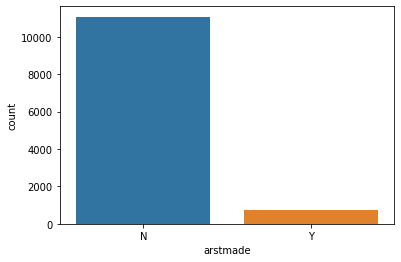

In [89]:
sns.countplot(x=df_total["arstmade"])

#### 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

<AxesSubplot:xlabel='arstmade', ylabel='count'>

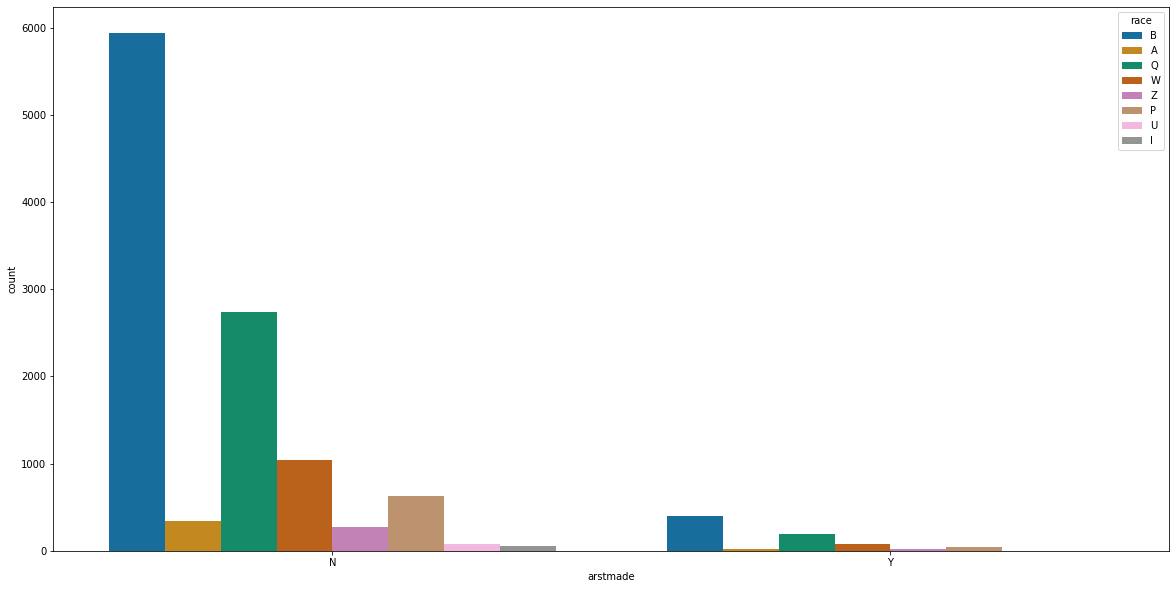

In [90]:
fig, axs = plt.subplots(figsize=(20,10))

sns.countplot(
    x="arstmade",
    data=df_total,
    hue="race",
    palette="colorblind"
)

#### 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

<AxesSubplot:xlabel='arstmade', ylabel='count'>

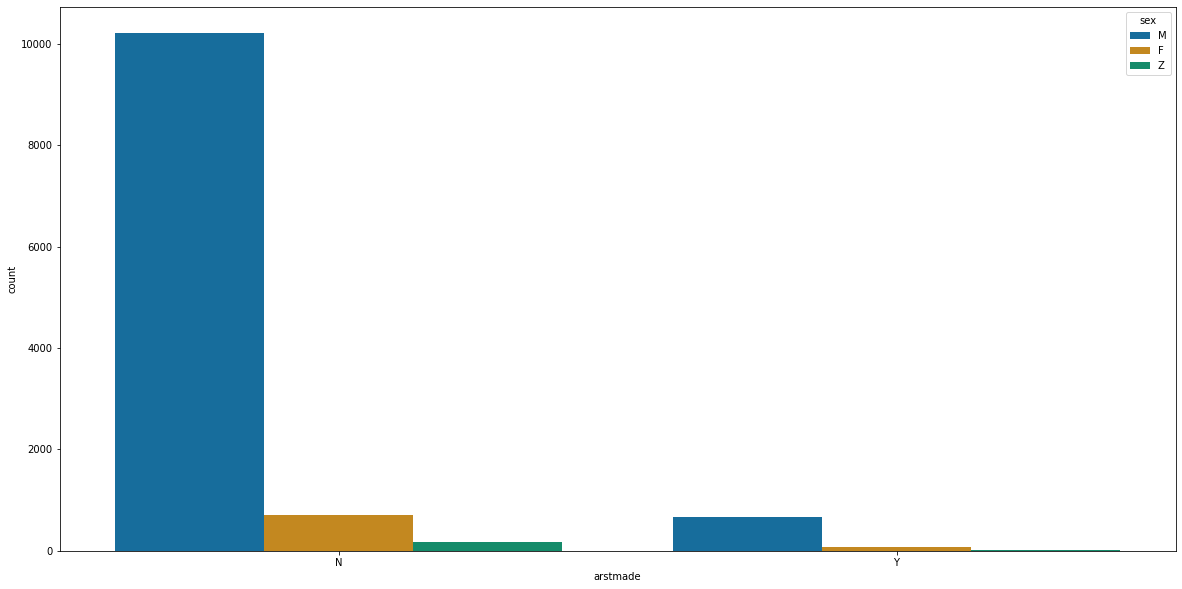

In [91]:
fig, axs = plt.subplots(figsize=(20,10))

sns.countplot(
    x="arstmade",
    data=df_total,
    hue="sex",
    palette="colorblind"
)

#### 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [92]:
df_total["arstmade"].replace("N",0,inplace=True)
df_total["arstmade"].replace("Y",1,inplace=True)

#### 4.5   Muestre   en   un   gráfico   la   probabilidad   que   un   individuo   sea   arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?

<Figure size 576x432 with 0 Axes>

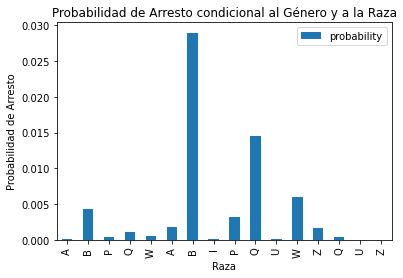

In [192]:
probabilidad_condicional = df_total.groupby(['sex', 'race'])['arstmade'].mean().reset_index()
probabilidad_condicional = probabilidad_condicional[probabilidad_condicional["arstmade"] != 0]

prob_prior_genero = df_total['sex'].value_counts() / len(df_total)
prob_prior_raza = df_total['race'].value_counts() / len(df_total)

prob_arresto_condicional = probabilidad_condicional.merge(prob_prior_genero.rename('prob_prior_genero'), 
                                                          left_on='sex', right_index=True)
prob_arresto_condicional = prob_arresto_condicional.merge(prob_prior_raza.rename('prob_prior_raza'), 
                                                          left_on='race', right_index=True)
prob_arresto_condicional['probability'] = prob_arresto_condicional['arstmade'] * prob_arresto_condicional['prob_prior_genero'] * prob_arresto_condicional['prob_prior_raza']
prob_arresto_condicional = prob_arresto_condicional.groupby(['sex', 'race'])['probability'].sum().reset_index()

plt.figure(figsize=(8, 6))
prob_arresto_condicional.plot(kind='bar', x='race', y='probability', stacked=True)

plt.xlabel('Raza')
plt.ylabel('Probabilidad de Arresto')
plt.title('Probabilidad de Arresto condicional al Género y a la Raza')

plt.show()

Por el grafico podemos ver que ciertas razas tienen mayor probabilidad de ser arrestadas que otras.

#### 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. Los   atributos   que   tienen   el   prefijo   pf   (['pf_hands'],['pf_wall'],   ['pf_grnd'],   ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'.Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia

In [95]:
df_total["violencia"] = (df_total["pf_hands"] == "Y") | (df_total["pf_wall"] == "Y") | (df_total["pf_grnd"] == "Y") | (df_total["pf_drwep"] == "Y") | (df_total["pf_ptwep"] == "Y") | (df_total["pf_baton"] == "Y") | (df_total["pf_hcuff"] == "Y") | (df_total["pf_pepsp"] == "Y") |(df_total["pf_other"] == "Y")

In [96]:
df_total["violencia"].replace(True,"Y",inplace=True)
df_total["violencia"].replace(False,"N",inplace=True)

In [97]:
df_total["violencia"].value_counts("%")

N    0.754165
Y    0.245835
Name: violencia, dtype: float64

#### 6.- Modelación 

#### 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar  variables  que  expliquen  lo  mismo,  ¡recuerde  que  acaba  de  crear  una  variable  a  partir  de  otras!,  además  recuerde  que  creó  una  variable  numérica  que  es  una  categoría  :)  ).  Luego  genere  los  sets  de  train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

In [98]:
df_modelo1 = df_total.drop(['pf_hands', 'pf_wall', 'pf_grnd',
                                  'pf_drwep', 'pf_ptwep', 'pf_baton', 
                                  'pf_hcuff', 'pf_pepsp', 'pf_other'], axis = 1)

df_modelo1.sample()

,year,pct,ser_num,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,...,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,meters,month,violencia
6121,2010,60,2533,2125,1,I,H,1.0,CPW MISD PSA #1475,2,...,U,,987914,148708,CM,1.0,20.0,3.3528,4,N


In [99]:
df_modelo1["violencia"] = df_modelo1["violencia"].apply(str) 

In [100]:
df_modelo1 = pd.get_dummies(df_modelo1, drop_first=True)
df_modelo1.head(5)

,year,pct,ser_num,timestop,perobs,perstop,arstmade,compyear,comppct,repcmd,...,ycoord_263899,ycoord_263919,ycoord_263957,ycoord_266523,ycoord_266571,ycoord_266641,ycoord_267288,ycoord_268457,dettypcm_CM,violencia_Y
0,2009,41,1779,130,1.0,2,0,0,0,41,...,0,0,0,0,0,0,0,0,1,0
1,2009,108,5805,1050,3.0,5,0,0,0,108,...,0,0,0,0,0,0,0,0,1,0
2,2009,43,8340,1450,1.0,1,0,0,0,43,...,0,0,0,0,0,0,0,0,1,0
3,2009,77,932,1843,5.0,5,0,0,0,77,...,0,0,0,0,0,0,0,0,1,0
4,2009,110,11224,1655,3.0,10,0,0,0,110,...,0,0,0,0,0,0,0,0,1,0


In [101]:
#Dividir en train y test
train = df_modelo1[df_modelo1["year"] == 2009]
test = df_modelo1[df_modelo1["year"] == 2010]

print(f"El dataset de entrenamiento está contiene {train.shape[0]} filas y {train.shape[1]} columnas")
print("----------------------------------------------")
print(f"El dataset de entrenamiento está contiene {test.shape[0]} filas y {test.shape[1]} columnas")

El dataset de entrenamiento está contiene 5812 filas y 28517 columnas
----------------------------------------------
El dataset de entrenamiento está contiene 6013 filas y 28517 columnas


#### 6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [103]:
#Train
#==================================================================================
X_train = train.drop(["arstmade"], axis = 1)
y_train = train["arstmade"]

#Test
#==================================================================================
test = test.dropna()
X_test = test.drop(["arstmade"], axis = 1)
y_test = test["arstmade"]

In [104]:
# Crear modelo de regresión logística
#==================================================================================
model_rl = LogisticRegression(max_iter=1000)

# Entrenar el modelo
#==================================================================================
model_rl.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

-----------------------------------
Métricas de Evaluación de Desempeño
-----------------------------------
Accuracy: 0.9336
F1 Score: 0.0000


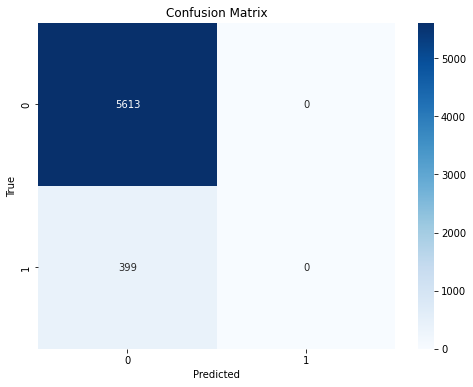

In [105]:
y_pred = model_rl.predict(X_test)

# Obtener Accuracy y F1_score
# ==============================================================================
print("-----------------------------------")
print("Métricas de Evaluación de Desempeño")
print("-----------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Generate the confusion matrix
# ==============================================================================
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap="Blues", fmt="d", ax=ax
)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

In [106]:
clf = GradientBoostingClassifier()

# Entrenar el modelo
#==================================================================================
clf.fit(X_train, y_train)

GradientBoostingClassifier()

-----------------------------------
Métricas de Evaluación de Desempeño
-----------------------------------
Accuracy: 0.9701
F1 Score: 0.7479


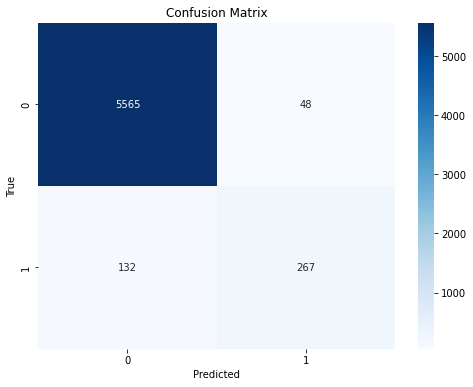

In [107]:
y_pred_clf = clf.predict(X_test)

# Obtener Accuracy y F1_score
# ==============================================================================
print("-----------------------------------")
print("Métricas de Evaluación de Desempeño")
print("-----------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_clf):.4f}")

# Generate the confusion matrix
# ==============================================================================
cm = confusion_matrix(y_test, y_pred_clf)

# Plot the confusion matrix
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap="Blues", fmt="d", ax=ax
)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

En este caso el modelo que presenta mejor metrica es el de Gradient Boosting con un Accuracy de 0.97.

¿Como podemos mejorar el modelo?

- Noramlizar valores para el caso de valores muy altos o muy bajos:
- Filtrando a las variables con mas peso dentro de la descripcion del modelo.
- Optimizar variables del modelo para encontrar los que den el mejor resultado.